In [1]:
# 1. Make a graph (adjacency list) based on which student is adjacent with which of these people.

import os
import pandas as pd


def create_adjacency_list(directory):
    """
    Creates an adjacency list graph from CSV files in a directory.
    Each CSV file represents a node, and each name within the CSV is also a node.
    If a name is found in a CSV, an edge is created between the CSV file node and the name node.

    Args:
        directory (str): Path to the directory containing CSV files.

    Returns:
        dict: Adjacency list representing the graph.
    """

    graph = {}

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            parent_node = os.path.splitext(filename)[0]  # Filename without extension
            if parent_node not in graph:
                graph[parent_node] = []

            try:

                df = pd.read_csv(
                    filepath,
                    skiprows=[0],
                    header=None,
                    names=["First Name", "Last Name", "Company"],
                )

                for _, row in df.iterrows():
                    full_name = f"{row['First Name']} {row['Last Name']}".strip()
                    if full_name:
                        if full_name not in graph:
                            graph[full_name] = (
                                []
                            )  # Initialize the node if it doesn't exist

                        if full_name not in graph[parent_node]:
                            graph[parent_node].append(
                                full_name
                            )  # Add edge from filename to name

                        if parent_node not in graph[full_name]:
                            graph[full_name].append(
                                parent_node
                            )  # Add edge from name to filename

            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return graph


# Example usage:

directory = "cleaned_data"

adjacency_list = create_adjacency_list(directory)

# Print first 20 elements of the adjacency list
for i, (node, neighbors) in enumerate(adjacency_list.items()):
    if i >= 20:
        break
    print(f"{node}: {neighbors}")


Aaditya Raj: ['Aakash Kumar', 'Aakash Deep', 'Aarti Patil', 'Abhinab Roy', 'Abhishek Kumar', 'Abhishek Tripathi', 'Achal Agrawal, PhD', 'Aditya Singh', 'Aditya agrahari', 'Adityansh Chand', 'Afzal Raza', 'Ajay Jatav', 'Ajay Kumar', 'Ajeet Kumar', 'Ajit Yadav', 'Alok Raj', 'Aman Verma', 'Aman Singh', 'Aman Adarsh', 'Amir Khan', 'Amit Kumar', 'Amit Diwakar', 'Amit Singhal', 'Ammar Husain', 'Amrita Kumari', 'Amrita Yadav', 'Anamika Kumari', 'Anand Pandey', 'Animesh Awasthi', 'Ankit Kumar', 'Ankita Pancholi', 'Anmol Kumar', 'Anoop Kumar', 'Anshu Kumar', 'Anshul Sharma', 'Anuradha Tiwari', 'Arjun Kadam', 'Arpit Tiwari', 'Arpit Sahu', 'Arpita Tripathi', 'Arun Singh', 'Aryan Saini', 'Ashutosh Kumar', 'Ashwin Yadav', 'Aslam Khan', 'Avinash kumar', 'Ayush Yadav', 'Ayush Katiyar', 'Ayush Kumar', 'Bhagwan singh', 'Bhagwati Chouhan', 'Bharat Suthar', 'Bhaskar Mahato', 'Bikram Ravidas', 'Byagari Praveen Kumar', 'CHANDAN GIRI', 'Challa Trivedh Kumar', 'Chandan Kumar', 'Chelsi Saini', 'Chhaya Pawar',

In [2]:
import csv

# Save the adjacency list to a CSV file
csv_file = "adjacency_list.csv"

try:
    with open(csv_file, "w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow(["Node", "Neighbors"])  # Write header

        for node, neighbors in adjacency_list.items():
            writer.writerow([node, ", ".join(neighbors)])

    print(f"Adjacency list saved to {csv_file}")
except Exception as e:
    print(f"Error saving adjacency list to CSV: {e}")


Adjacency list saved to adjacency_list.csv


In [3]:
# Saving all the sitare students' names to sitare_student.csv

import os


directory = "renamed_data"


# Get all CSV filenames from the directory


csv_files = [

    os.path.splitext(f)[0] for f in os.listdir(directory) if f.endswith(".csv")
]



# Save the filenames to sitare_student.csv


with open("sitare_students.csv", "w", newline="", encoding="utf-8") as file:

    writer = csv.writer(file)

    writer.writerow(["Student Name"])  # Write header

    for filename in csv_files:

        writer.writerow([filename])


print(f"Successfully saved {len(csv_files)} student names to sitare_student.csv")


Successfully saved 126 student names to sitare_student.csv


In [4]:
def calculate_all_degrees(graph):
    """
    Calculates the degree (number of connections) for each node in the graph.

    Args:
        graph (dict): Adjacency list representing the graph

    Returns:
        dict: Dictionary where keys are nodes and values are their degrees
    """
    degrees = {}
    for node, neighbors in graph.items():
        degrees[node] = len(neighbors)

    return degrees


# Calculate degrees for all nodes
all_degrees = calculate_all_degrees(adjacency_list)

# Convert to DataFrame and sort by degree in descending order
degree_df = pd.DataFrame.from_dict(all_degrees, orient="index", columns=["Degree"])
degree_df.index.name = "Node"
degree_df = degree_df.sort_values("Degree", ascending=False)

# Save to CSV
degree_df.to_csv("all_node_degrees.csv")

# Print some statistics
print(f"Total nodes: {len(all_degrees)}")
print("\nTop 10 nodes by degree:")
print(degree_df.head(10))


Total nodes: 29584

Top 10 nodes by degree:
                      Degree
Node                        
Rohit Malviya           4352
Ravi Rajput             4116
Manoj Dewda             4014
Ramraj Nagar            3772
Nirmal Mewada           3585
Pranjal Dubey           3390
Challa Trivedh Kumar    2937
Himanshu Kumar          2723
Neeraj Parmar           2720
Aman Singh              2690


In [5]:
# 2. Find the degree of each student

import pandas as pd


# Read the sitare students CSV
sitare_students = pd.read_csv("sitare_students.csv")

# Create a dictionary to store student degrees
student_degrees = {}

# Calculate degree for each student
for student in sitare_students["Student Name"]:
    if student in adjacency_list:
        student_degrees[student] = len(adjacency_list[student])
    else:
        student_degrees[student] = 0

# Convert to DataFrame
student_degrees_df = pd.DataFrame.from_dict(
    student_degrees, orient="index", columns=["Degree"]
)
student_degrees_df.index.name = "Student"

# Sort by degree in descending order
student_degrees_df = student_degrees_df.sort_values("Degree", ascending=False)

# Save to CSV
student_degrees_df.to_csv("sitare_student_degrees.csv")

print("Student degrees saved to sitare_student_degrees.csv")

# Print the degree of the first 20 students
print("Degrees of the first 20 students:")
print(student_degrees_df.head(20))


Student degrees saved to sitare_student_degrees.csv
Degrees of the first 20 students:
                       Degree
Student                      
Rohit Malviya            4352
Ravi Rajput              4116
Manoj Dewda              4014
Ramraj Nagar             3772
Nirmal Mewada            3585
Pranjal Dubey            3390
Challa Trivedh Kumar     2937
Himanshu Kumar           2723
Neeraj Parmar            2720
Aman Singh               2690
Byagari Praveen Kumar    2538
Janu Chaudhary           2193
Ujjval Baijal            2182
Prabhat Patidar          2128
Alok Raj                 2035
Rajiv Kumar              1946
Chandan Giri             1942
Shubham Kumar            1821
Prem kumar               1786
Ayush Kumar              1710


In [6]:
# 3. Given any pair of students, find a random walk connecting them.

import random


def random_walk(graph, start, end, max_steps=1000):
    """
    Performs a random walk from start node to end node in the graph.

    Args:
        graph (dict): Adjacency list representing the graph
        start (str): Starting node
        end (str): Target node
        max_steps (int): Maximum number of steps before giving up

    Returns:
        list: List of nodes representing the path if found, None otherwise
    """
    if start not in graph or end not in graph:
        return None

    current = start
    walk = [current]
    steps = 0

    while current != end and steps < max_steps:
        if not graph[current]:  # If current node has no neighbors
            return None

        # Randomly select next node from neighbors
        current = random.choice(graph[current])
        walk.append(current)
        steps += 1

    return walk if current == end else None


# Example usage
def print_random_walk_between_students(student1, student2):
    walk = random_walk(adjacency_list, student1, student2)
    if walk:
        print(f"Walk found from {student1} to {student2}:")
        print(" -> ".join(walk))
        print(f"Walk length: {len(walk) - 1} steps")
    else:
        print(
            f"No random walk found between {student1} and {student2} within the max_limit of steps."
        )


# Select two random students from sitare_students DataFrame

student1 = sitare_students["Student Name"].sample(n=1).iloc[0]
student2 = sitare_students["Student Name"].sample(n=1).iloc[0]
while student1 == student2:  # Ensure we get two different students
    student2 = sitare_students["Student Name"].sample(n=1).iloc[0]

# We can also give the names of two students directly
# student1 = "Student A"
# student2 = "Student B"

print(f"\nFinding random walk between two students:")
print_random_walk_between_students(student1, student2)



Finding random walk between two students:
Walk found from Rohit Malviya to Ujjval Baijal:
Rohit Malviya -> Vishnu Dixit -> Rohit Malviya -> Tanishq Rathore -> Rohit Malviya -> Divyanshu Dixit -> Mayank Raj -> Nidhi Uniyal -> Mayank Raj -> Shreya Khanna -> Ramraj Nagar -> Sai Vignesh -> Prem kumar -> Shlok Gupta -> SHAILENDRA JHA -> Shlok Gupta -> Saurabh Yadav -> Himanshu Kumar -> Shashwat Maurya -> Ramraj Nagar -> Ashutosh Kumar -> Arun Singh -> Lakhan Rathore -> Aman Verma -> Ritesh Kumar Yadav -> Kuldeep Saraswat -> Rahul Sen -> Bhaskar Mahato -> Ranjan Singh -> Vivek Kumar -> KARTIKEY MALL -> Vivek Kumar -> Deependra Shukla -> Janu Chaudhary -> Ayush Mondal -> Chandan Giri -> Manish Sevta -> Vivek Kumar -> Sneha Kumari -> Rajiv Kumar -> Pankaj Rishi -> Vivek Kumar -> Samay Jain -> Vivek Kumar -> Aditi Rajput -> Ravi Rajput -> Ajay Jatav -> Ravi Mourya -> Shivang Dubey -> Shivansh Mishra -> Himanshu Kumar -> Nikhil Singh -> Ranjeet Kumar Yadav -> Pragati Sharma -> Mohit Sharma -> S

In [7]:
# a. Prune this random walk to find a path connecting the given pair or students.
def prune_path(path):
    """
    Prunes the path to ensure it only contains unique nodes.

    Args:
        path (list): List of nodes representing the path

    Returns:
        list: Pruned path with unique nodes and edges
    """
    seen = set()
    pruned_path = []

    for node in path:
        if node not in seen:
            seen.add(node)
            pruned_path.append(node)

    return pruned_path


# Example usage
def find_and_prune_path_between_students(student1, student2):
    walk = random_walk(adjacency_list, student1, student2)
    if walk:
        pruned_path = prune_path(walk)
        print(f"Path found from {student1} to {student2}:")
        print(" -> ".join(pruned_path))
        print(f"Pruned path length: {len(pruned_path) - 1} steps")
    else:
        print(f"No path found between {student1} and {student2}")


# Select two random students from sitare_students DataFrame
student1 = sitare_students["Student Name"].sample(n=1).iloc[0]
student2 = sitare_students["Student Name"].sample(n=1).iloc[0]
while student1 == student2:  # Ensure we get two different students
    student2 = sitare_students["Student Name"].sample(n=1).iloc[0]

print(f"Finding and pruning path between random students:")
find_and_prune_path_between_students(student1, student2)


Finding and pruning path between random students:
Path found from Satish Mahto to Prabhat Patidar:
Satish Mahto -> Shubham Kumar -> Mitali  Kotwal -> Muskan Priya -> Varad Pendse -> Manoj Dewda -> Aman Dhakad -> Prabhat Patidar
Pruned path length: 7 steps


In [8]:
# b. Compute some statistical estimates of the length of these random walks and the pruned paths.

import numpy as np


def collect_path_statistics(graph, num_trials=10000):
    """
    Collect statistics about random walks and pruned paths between random pairs of students.

    Args:
        graph (dict): Adjacency list representing the graph
        num_trials (int): Number of random trials to perform

    Returns:
        dict: Dictionary containing various statistics
    """
    random_walk_lengths = []
    pruned_path_lengths = []
    success_count = 0

    for _ in range(num_trials):
        # Select two random students
        student1 = sitare_students["Student Name"].sample(n=1).iloc[0]
        student2 = sitare_students["Student Name"].sample(n=1).iloc[0]
        while student1 == student2:
            student2 = sitare_students["Student Name"].sample(n=1).iloc[0]

        # Get random walk path
        path = random_walk(graph, student1, student2)
        if path:
            success_count += 1
            random_walk_lengths.append(len(path) - 1)

            # Get pruned path
            pruned_path = prune_path(path)
            pruned_path_lengths.append(len(pruned_path) - 1)

    stats = {
        "success_rate": success_count / num_trials,
        "random_walk_avg": np.mean(random_walk_lengths) if random_walk_lengths else 0,
        "random_walk_std": np.std(random_walk_lengths) if random_walk_lengths else 0,
        "pruned_path_avg": np.mean(pruned_path_lengths) if pruned_path_lengths else 0,
        "pruned_path_std": np.std(pruned_path_lengths) if pruned_path_lengths else 0,
    }

    return stats


# Collect and print statistics
stats = collect_path_statistics(adjacency_list)
print("Path Statistics:")
print(f"Success Rate: {stats['success_rate']:.2%}")
print(
    f"Random Walk Average Length: {stats['random_walk_avg']:.2f} ± {stats['random_walk_std']:.2f}"
)
print(
    f"Pruned Path Average Length: {stats['pruned_path_avg']:.2f} ± {stats['pruned_path_std']:.2f}"
)


Path Statistics:
Success Rate: 83.06%
Random Walk Average Length: 296.64 ± 261.55
Pruned Path Average Length: 187.07 ± 145.79


In [9]:
def calculate_network_density(graph, students):
    """
    Calculate network density for the student network.
    Density = actual connections / possible connections
    For undirected graphs: possible connections = n * (n-1) / 2
    where n is the number of nodes

    Args:
        graph (dict): Adjacency list representing the graph
        students (list): List of student names

    Returns:
        float: Network density
    """
    # Number of nodes
    n = len(students)

    # Calculate possible connections
    possible_connections = (n * (n - 1)) / 2

    # Calculate actual connections (only between students)
    actual_connections = 0
    for student in students:
        if student in graph:
            # Count connections only to other students
            actual_connections += len(
                [neighbor for neighbor in graph[student] if neighbor in students]
            )

    # Since the graph is undirected, each connection is counted twice
    actual_connections = actual_connections / 2

    density = (
        (actual_connections / possible_connections) * 100
        if possible_connections > 0
        else 0
    )

    return density


# Get list of students from sitare_students DataFrame
sitare_student_list = sitare_students["Student Name"].tolist()

# Calculate density
density = calculate_network_density(adjacency_list, sitare_student_list)

print(f"Network Density: {density:.4f} %")
print(f"Total number of students: {len(sitare_student_list)}")
print(
    f"Possible connections: {(len(sitare_student_list) * (len(sitare_student_list) - 1)) / 2}"
)


Network Density: 83.2381 %
Total number of students: 126
Possible connections: 7875.0


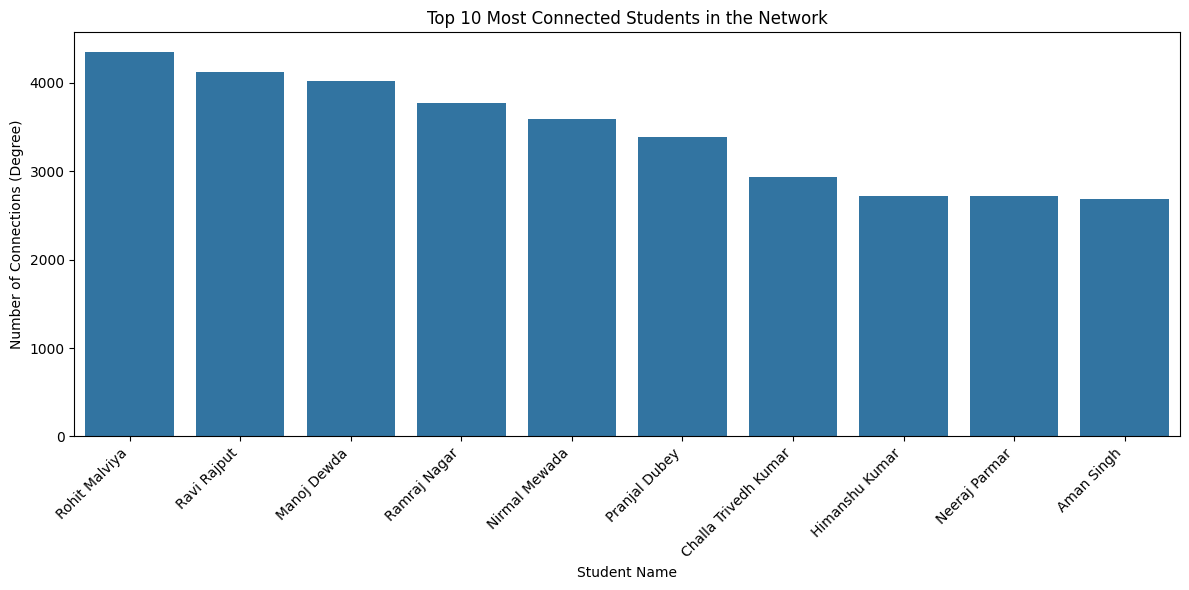


Centrality Analysis:

Top 3 Most Connected Students:
Rohit Malviya: 4352 connections
Ravi Rajput: 4116 connections
Manoj Dewda: 4014 connections

Network Overview:
Average Connections per Student: 864.52
Median Connections: 451.50
Standard Deviation: 935.68

Connection Distribution:
25th percentile: 300 connections
50th percentile: 452 connections
75th percentile: 887 connections


In [10]:
import seaborn as sns

# For visualization
import matplotlib.pyplot as plt

# Get top 10 most connected students from student_degrees_df
top_10_connected = student_degrees_df.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_connected.reset_index(), x="Student", y="Degree")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Most Connected Students in the Network")
plt.xlabel("Student Name")
plt.ylabel("Number of Connections (Degree)")
plt.tight_layout()

# Save the plot
plt.savefig("top_students.png")
plt.show()


# Print analysis
print("\nCentrality Analysis:")
print("\nTop 3 Most Connected Students:")
for student, degree in top_10_connected.head(3).iterrows():
    print(f"{student}: {degree['Degree']} connections")

print("\nNetwork Overview:")
print(f"Average Connections per Student: {student_degrees_df['Degree'].mean():.2f}")
print(f"Median Connections: {student_degrees_df['Degree'].median():.2f}")
print(f"Standard Deviation: {student_degrees_df['Degree'].std():.2f}")

# Calculate percentile ranks for context
# Calculate quartiles to understand the distribution of connections
percentiles = student_degrees_df["Degree"].quantile([0.25, 0.5, 0.75])
print("\nConnection Distribution:")
print(
    f"25th percentile: {percentiles[0.25]:.0f} connections"
)  # 25% of students have this many or fewer connections
print(
    f"50th percentile: {percentiles[0.50]:.0f} connections"
)  # Median number of connections
print(
    f"75th percentile: {percentiles[0.75]:.0f} connections"
)  # 75% of students have this many or fewer connections


In [11]:
from collections import deque
import random
import numpy as np


def calculate_path_metrics(graph, students, num_samples=100):
    """
    Calculate various path metrics between students in the network.

    Args:
        graph (dict): Adjacency list representing the graph
        students (list): List of student names
        num_samples (int): Number of random pairs to sample

    Returns:
        dict: Dictionary containing path metrics
    """

    def bfs_shortest_path(graph, start, end):
        """Find shortest path between two nodes using BFS"""
        if start not in graph or end not in graph:
            return None

        queue = deque([[start]])
        visited = {start}

        while queue:
            path = queue.popleft()
            node = path[-1]

            if node == end:
                return path

            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    new_path = list(path)
                    new_path.append(neighbor)
                    queue.append(new_path)
        return None

    path_lengths = []
    longest_paths = []
    max_length = 0

    # Sample random pairs of students
    sample_pairs = []
    for _ in range(num_samples):
        s1 = random.choice(students)
        s2 = random.choice(students)
        while s1 == s2:
            s2 = random.choice(students)
        sample_pairs.append((s1, s2))

    # Calculate path lengths
    for s1, s2 in sample_pairs:
        path = bfs_shortest_path(graph, s1, s2)
        if path:
            path_length = len(path) - 1
            path_lengths.append(path_length)

            if path_length > max_length:
                max_length = path_length
                longest_paths = [path]
            elif path_length == max_length:
                longest_paths.append(path)

    metrics = {
        "average_separation": np.mean(path_lengths) if path_lengths else None,
        "longest_paths": {
            "length": max_length,
            "paths": longest_paths[:5],  # Limit to 5 example paths
        },
        "percentile_90": np.percentile(path_lengths, 90) if path_lengths else None,
    }

    return metrics


# Calculate metrics
metrics = calculate_path_metrics(adjacency_list, sitare_student_list)

print("\nPath Analysis:")
if metrics["average_separation"] is not None:
    print(f"Average degrees of separation: {metrics['average_separation']:.2f}")
    print(f"\nLongest path length: {metrics['longest_paths']['length']} steps")
    print("\nExample longest paths found:")
    for i, path in enumerate(metrics["longest_paths"]["paths"], 1):
        print(f"Path {i}: {' -> '.join(path)}")
    print(f"\n90% of paths are ≤ {metrics['percentile_90']:.1f} steps")
else:
    print("No valid paths found between sampled pairs")



Path Analysis:
Average degrees of separation: 1.17

Longest path length: 2 steps

Example longest paths found:
Path 1: Ravi Mourya -> Aaditya Raj -> Alok Raj
Path 2: Ayush Yadav -> Aditya Singh -> Pragati Chauhan
Path 3: Nidhi Kumari -> Abhishek Singh -> Rajiv Kumar
Path 4: Sauhard Kumar -> Aditya Singh -> Shilpi Shaw
Path 5: Sarthaksuman Mishra -> Aaditya Raj -> Prabhat Patidar

90% of paths are ≤ 2.0 steps



--- Company Insights ---
Company
Google                                    391
Amazon                                    297
HCLTech                                   266
Microsoft                                 221
Tata Consultancy Services                 215
                                         ... 
Codevirussec                                1
Bluestockâ„¢ðŸ”º                            1
Richmond General Trading Company L.L.C      1
BrewSystems LLC                             1
vivo Mobile India Pvt. Ltd.                 1
Name: count, Length: 12420, dtype: int64
Company insights saved to 'company_insights.csv'.

--- Diversity and Representativeness ---
Company
Google                                    1.156223
Amazon                                    0.878256
HCLTech                                   0.786587
Microsoft                                 0.653517
Tata Consultancy Services                 0.635775
                                            ...   
Codevirussec 

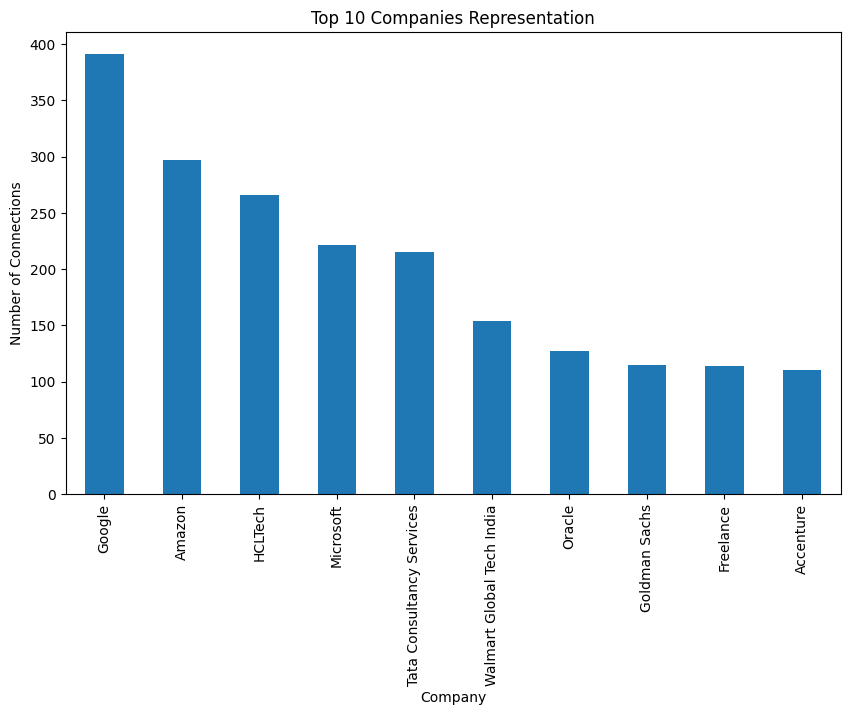


Analysis complete.


In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder containing all CSV files
folder_path = "cleaned_data"  # Replace with your folder path

# List to store individual DataFrames
dataframes = []

# Loop through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if file is a CSV
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Combine all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)
# Remove duplicate rows
combined_data = combined_data.drop_duplicates()

# Analysis begins here

# 1. Company Insights
print("\n--- Company Insights ---")
company_counts = combined_data["Company"].value_counts()
print(company_counts)
company_counts.to_csv("company_insights.csv", header=True)
print("Company insights saved to 'company_insights.csv'.")


# 2. Diversity and Representativeness
# This is also the same as company insights but normalized, so it can be simplified
print("\n--- Diversity and Representativeness ---")
representation = company_counts / len(combined_data) * 100
print(representation)
representation.to_csv("company_representation.csv", header=True)
print("Company representation saved to 'company_representation.csv'.")

# Visualization: Company Representation (Bar Chart)
print("\n--- Generating Visualization ---")
plt.figure(figsize=(10, 6))
company_counts.head(10).plot(
    kind="bar", title="Top 10 Companies Representation"
)  # Top 10 companies
plt.xlabel("Company")
plt.ylabel("Number of Connections")
# Save the plot
plt.savefig("top_companies.png", bbox_inches="tight")
plt.show()
print("\nAnalysis complete.")
